# Full Pipeline Test
This section tests the Full Pipeline - which runs on a single participant's data.

In [1]:
import cogrecon
from cogrecon.core.full_pipeline import full_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
from cogrecon.core.tools import generate_random_test_points

Original Misplacement: 0.352177348825
Original Swap: 0.2
Original Edge Resizing: 0.144978211534
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 1], [0, 4]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 0.60972172735
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 0.448312903617
Raw Deanonymized Misplacement: 0.183915667886
Post-Deanonymized Misplacement: 0.183915667886
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.787181541219
Scaling: 1.02817345477
Translation Magnitude: 0.0468552927144
Translation: [-0.028769319390357928, -0.036983032828197981]
Geometric Distance Threshold: 0.448312903617
Post-Transform Misplacement: 0.175866611803
Number of Components: 3
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Mis

C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


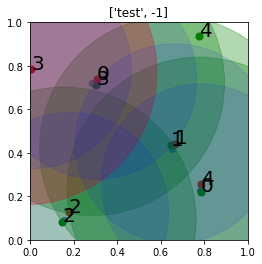

array([[0.35217734882545293, 0.2, 0.14497821153365173, 0.7,
        list([[0, 1], [0, 4]]), 3, 2, 0.60972172734967889, 4, 1,
        0.44831290361667514, 0.18391566788620511, 0.18391566788620511,
        False, 1, 0.78718154121907613, 1.0281734547745547,
        0.046855292714441499,
        list([-0.028769319390357928, -0.036983032828197981]),
        0.44831290361667514, 0.17586661180330784, 3, 2, 0, 0, 0, 0, 1, 3,
        2, 1, 0.45883898844403537, nan, nan, nan, nan, nan, nan,
        0.66053767505417682, 0.64173421673156084,
        list([[0, 3, 4], [1], [2]]), False, None, list([[0, 4], [3, 0]]),
        list([[4, 3]])]], dtype=object)

In [2]:
# Test with random first
a, b = generate_random_test_points()
data = ParticipantData([TrialData(a, b)])
config = AnalysisConfiguration(debug_labels=['test', -1])
full_pipeline(data, config, visualize=True, visualization_extent=[[0., 1.], [0., 1.]])

In [ ]:
# Now test with data
actual_coordinates_filepath = r"Z:\Kevin\iPosition\Hillary\MRE\actual_coordinates.txt"
filepath_template = r"Z:\Kevin\iPosition\Hillary\MRE\{0}\{0}position_data_coordinates.txt"
participant_ids = ['101', '104', '105', '112', '104', '101', '114', '118', '119', '120', '101', '104', '113', '120']
labels = ['Cycle Agree - 101', 'Cycle Agree - 104', 'Cycle Agree - 105', 'Cycle Agree - 112',
          'Debatable - 104',
          'New Single Swap - 101', 'New Single Swap - 114',
          'New Single Swap - 118', 'New Single Swap - 119', 'New Single Swap - 120',
          'Old False Positive - 101', 'Old False Positive - 104',
          'Old False Positive - 113', 'Old False Positive - 120']
trial_nums = [10, 12, 2, 6, 2, 0, 12, 10, 10, 14, 11, 10, 2, 12]

for pid, label, trial_n in zip(participant_ids, labels, trial_nums):
    data = ParticipantData.load_from_file(actual_coordinates_filepath, filepath_template.format(pid), (15, 5, 2))
    data.trials = [data.trials[trial_n]]
    config = AnalysisConfiguration(debug_labels=[label, trial_n])
    full_pipeline(data, config, visualize=True, visualization_extent=[[-640., 640.], [-480., 480.]])

In [ ]:
from cogrecon.core.data_flexing.dimension_removal import remove_dimensions

actual_coordinates_filepath = r"C:\Users\admin\Documents\GitHub\msl-iposition-pipeline\saved_data\iPositionConversion\071actual_coordinates.txt"
filepath_template = r"C:\Users\admin\Documents\GitHub\msl-iposition-pipeline\saved_data\iPositionConversion\{0}position_data_coordinates.txt"
participant_ids = ['071']
trial_nums = [3]
labels = ['071 - 4th Trial']

for pid, label, trial_n in zip(participant_ids, labels, trial_nums):
    data = ParticipantData.load_from_file(actual_coordinates_filepath, filepath_template.format(pid), (4, 10, 3))
    data.trials = [data.trials[trial_n]]
    config = AnalysisConfiguration(debug_labels=[label, trial_n])
    time_data = remove_dimensions(data, removal_dim_indices=[0, 1])
    space_data = remove_dimensions(data, removal_dim_indices=[2])
    full_pipeline(time_data, config, visualize=True, visualization_extent=[[0., 60.], [-4., 4.]], fig_size=(10, 2))
    full_pipeline(space_data, config, visualize=True, visualization_extent=[[-20., 20.], [-20., 20.]], fig_size=(10, 10))

# Batch Pipeline Test
This section tests the Batch Pipeline, which runs on a folder full of data files, automatically finding the appropriate files.

In [7]:
import cogrecon
from cogrecon.core.batch_pipeline import batch_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
import os, datetime
import easygui

In [ ]:
selected_directory = easygui.diropenbox()

if selected_directory is not None:
    print(selected_directory)
    print(type(selected_directory))
    if os.path.exists(selected_directory):
        batch_pipeline(str(selected_directory), datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.csv"), actual_coordinate_prefixes=True)
    elif selected_directory is not '':
        logging.error('Directory not found.')

In [11]:
batch_pipeline("Y:\Work\Time Travel Task\Paper Data (iPosition format cleaned)\iPositionConversion",
               datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.csv"), dimension=3, actual_coordinate_prefixes=True, removal_dim_indicies=[0, 1], collapse_trials=False)

In [5]:
import cogrecon.core.data_flexing.time_travel_task.time_travel_task_to_iposition as ttt2i

In [6]:
ttt2i.time_travel_task_to_iposition(r'\\192.168.2.2\kevroy314\Work\Time Travel Task\Paper Data (cleaned)', r'\\192.168.2.2\kevroy314\Work\Time Travel Task\Paper Data (iPosition format cleaned)')

027,4
021,1
021,2
021,3
021,4
022,1
022,2
022,3
022,4
023,1
023,2
023,3
023,4
024,1
024,2
024,3
024,4
025,1
025,2
025,3
025,4
026,1
026,2
026,3
026,4
027,1
027,2
027,3
042,4
031,1
031,2
031,3
031,4
032,1
032,2
032,3
032,4
033,1
033,2
033,3
033,4
034,1
034,2
034,3
034,4
035,1
035,2
035,3
035,4
036,1
036,2
036,3
036,4
037,1
037,2
037,3
037,4
038,1
038,2
038,3
038,4
039,1
039,2
039,3
039,4
040,1
040,2


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\site-packages\IPython\core\ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\site-packages\IPython\core\ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\site-packages\IPython\core\ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\inspect.py", line 1048, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\inspect.py", line 1012, in getframeinfo
    lines, lnum = findsource(frame)
  File "C:\Users\admin\AppData\Local\conda\conda\envs

IndexError: string index out of range